# MA's and MACD - Deviation Analysis

Feature of Interest: Closing Price

1. Calculate the difference between the values in current row and previous row
2. Calculate the Simple Moving Average, Cumultive Moving Average and Exponential Moving Average
3. Calculate the deviation between the MA's and the RL (Real Line) - (Oscillator Indicater MACD)

The MACD descriptional statistics returned for MACD - Deviation takes the trend direction into consideration here ie. - | +. We want to find a method to test if this will have an impact on using this data to predict value of the future closing price. 

We can make an assumption that this will as from a logical point of view we want to range that the next price is likely to fall within an not the direction (for the purpose of this study).

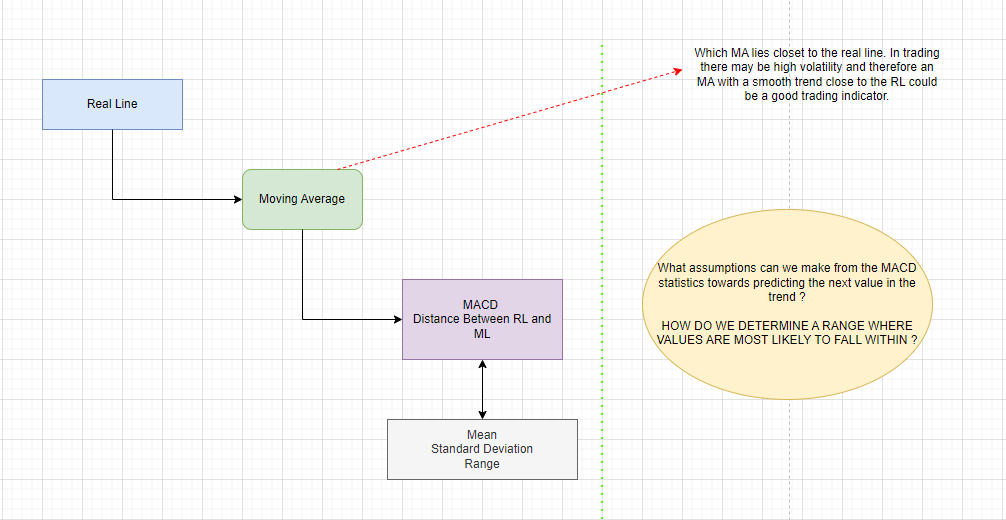

In [1]:
import numpy as np
import pandas as pd

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Create Dataframe from excel file & parse dates
data = pd.read_csv('AA.csv', parse_dates = True)

#create copy of orginal dataframe
saved_df = data.copy(deep = True)

#
# FEATURE ENGINEERING
data['close-change'] = data['Close'].diff() # difference between the values in current row and previous row
data['SMA'] = data.iloc[:,4].rolling(window=100).mean() # -->> simple moving average.
data['CMA'] = data.iloc[:,4].expanding(min_periods=100).mean() # -->> cumaltive moving average
data['EMA'] = data.iloc[:,4].ewm(span=80,adjust=False).mean() # -->> exponential moving average

#
data['deviation_close_sma'] = data.Close - data.SMA
data['deviation_close_CMA'] = data.Close - data.CMA
data['deviation_close_EMA'] = data.Close - data.EMA
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,close-change,SMA,CMA,EMA,deviation_close_sma,deviation_close_CMA,deviation_close_EMA
14658,2020-03-26,7.27,7.386,6.73,6.84,6.84,11916400,-0.25,16.9608,26.974808,14.298158,-10.1208,-20.134808,-7.458157
14659,2020-03-27,6.51,6.790,6.05,6.55,6.55,10075400,-0.29,16.8076,26.973415,14.106845,-10.2576,-20.423415,-7.556845
14660,2020-03-30,6.55,6.600,6.00,6.07,6.07,9615600,-0.48,16.6392,26.971989,13.908404,-10.5692,-20.901989,-7.838404
14661,2020-03-31,6.16,6.620,6.06,6.16,6.16,12502000,0.09,16.4749,26.970570,13.717086,-10.3149,-20.810570,-7.557086
14662,2020-04-01,5.96,6.610,5.71,6.25,6.25,10443300,0.09,16.3184,26.969156,13.532713,-10.0684,-20.719156,-7.282713


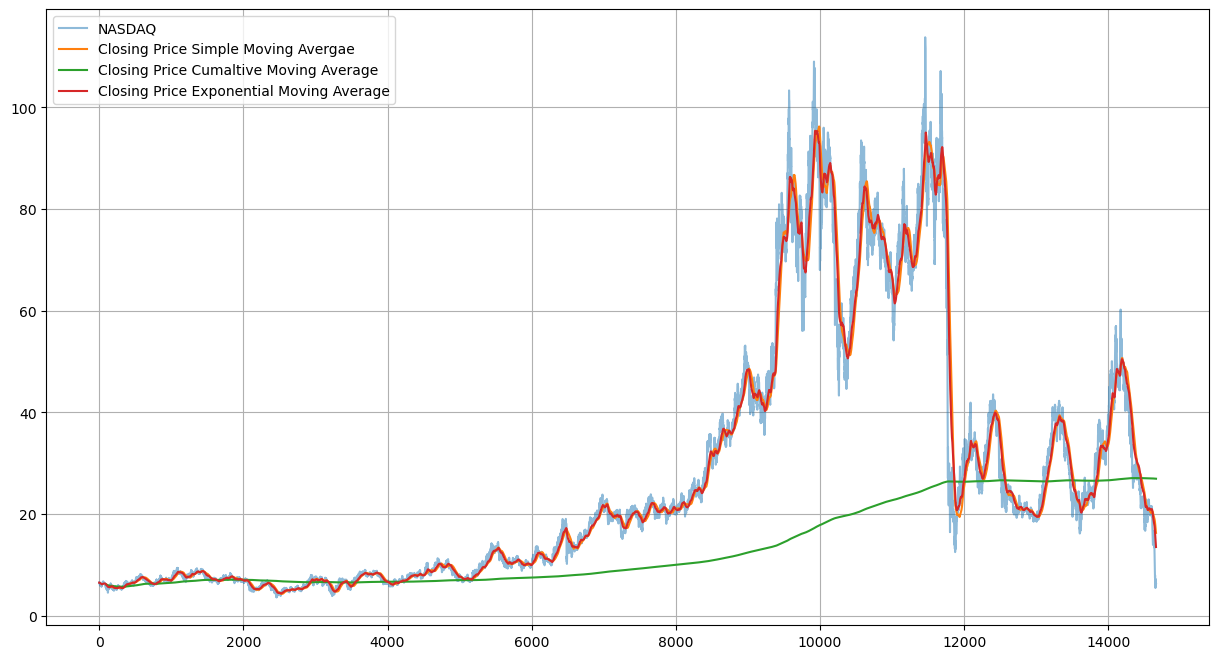

In [3]:
plt.figure(figsize=[15,8])
plt.grid(True)
plt.plot(data['Close'],label='NASDAQ',alpha=0.5)
plt.plot(data['SMA'],label='Closing Price Simple Moving Avergae')
plt.plot(data['CMA'],label='Closing Price Cumaltive Moving Average')
plt.plot(data['EMA'],label='Closing Price Exponential Moving Average')
plt.legend(loc=2)

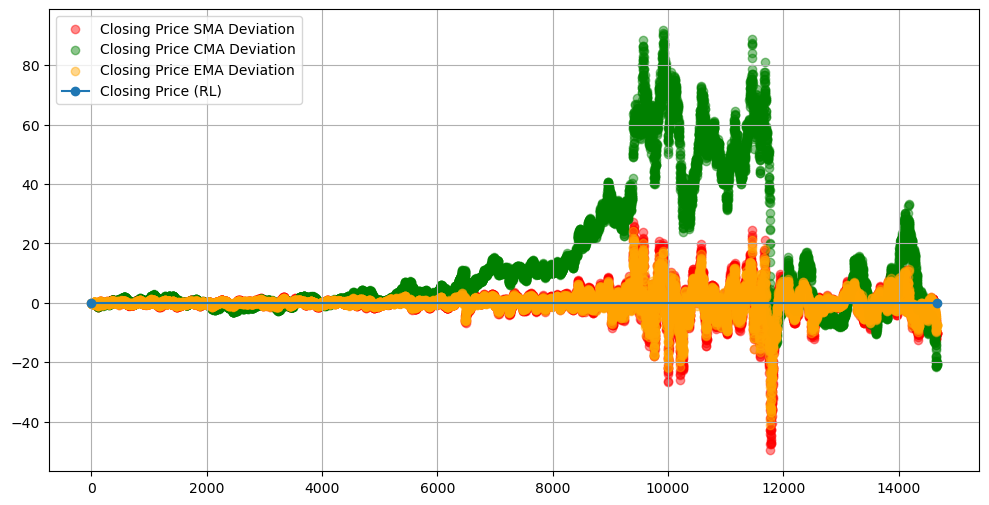

In [4]:
# data points which will sit along the x axis 
x1, y1 = [14662,0], [0,0] 

plt.figure(figsize=[12,6])
plt.grid(True)
plt.scatter(data.index,data['deviation_close_sma'],label='Closing Price SMA Deviation',color='red',alpha=0.45)
plt.scatter(data.index,data['deviation_close_CMA'],label='Closing Price CMA Deviation',color='g',alpha=0.45)
plt.scatter(data.index,data['deviation_close_EMA'],label='Closing Price EMA Deviation',color='orange',alpha=0.45)
plt.plot(x1, y1,label='Closing Price (RL)', marker = 'o')
plt.legend(loc=2)

### MACD

TRUE DEVIATION

Based on our returned statsitical information from the Moving Average deviation from RL (MACD) the EMA arguably has least deviation. However, we can see from the below descriptional statistics that data is -|+ taking into consideration the direction of the trend (hence volatile trend). 

For the purpose of this study we just want the distance between the RL and MA not the direction. This should give insight into to TRUE deviation from the RL.

DESCRIPTIONAL STATISTICS

In [5]:
print(data[['deviation_close_sma','deviation_close_CMA','deviation_close_EMA']].describe())

       deviation_close_sma  deviation_close_CMA  deviation_close_EMA
count         14564.000000         14564.000000         14663.000000
mean              0.025184            13.425481             0.018858
std               4.791861            21.114536             3.708225
min             -49.634445           -21.500337           -41.154679
25%              -0.885355             0.201871            -0.663879
50%               0.088491             3.337997             0.059682
75%               1.137459            15.709025             0.866057
max              27.186821            91.767651            24.274618


EMA

Quartiles (data sequentially ordered)
- min value is -41.154679
- max value is 24.274618
- 1/4 (25%) value is -0.663879
- median value is 0.059682
- 3/4 (75%) value is 0.866057

- Mean value of the data is 0.018858

- Standard Deviation of the data is 3.708225

HOW DO WE DETERMINE A RANGE WHERE VALUES ARE MOST LIKELY TO FALL WITHIN ?

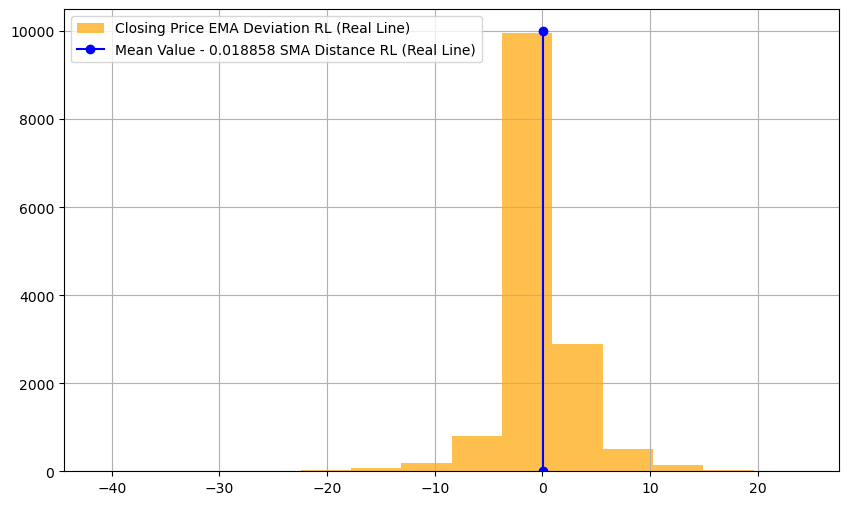

In [9]:
# data points which will sit along the x axis 
x1, y1 = [0.018858,0.018858], [10000,0] 

plt.figure(figsize=[10,6])
plt.grid(True)
plt.hist(data['deviation_close_EMA'], bins=14, label='Closing Price EMA Deviation RL (Real Line)',color='orange',alpha=0.7)
plt.plot(x1, y1,label='Mean Value - 0.018858 SMA Distance RL (Real Line)', marker = 'o', color='blue')
plt.legend(loc=2)

The below function will test if the change in the next observation falls within a range derived from our MACD statsitcs.

Essentially how good is this range at preicting the next vale ?

In [24]:
def test(greater,less,MA,deviation_close_MA):
    """MA - Moving Average we want to run this test agaisnt - use 'MA' sytnax """
    """deviation_close_MA - Feature we want to run test against - use 'deviation_close_MA' sytnax """
    """greater than represents the value we want to be greater than in the set of values"""
    """less than represents the value we want to be less than in the set of values"""
    """We want greater and less than to be close to the mean value of the MA in question"""
    
    global vals # -->> declare variable globally (callable outside function scope)
    vals = [] # empty list
    for value in data['close-change']:
        if (value >= greater) and (value <= less):
            vals.append(1)
        else:
            vals.append(0)
            
    # create new df
    global test
    test = data[['Close','close-change',MA,deviation_close_MA]]
    test['threshold'] = vals
    print(test)
    
    # = visualy analyse countplot
    sns.countplot(test, x="threshold")
    
    #
    counts = test['threshold'].value_counts()
    percs = test['threshold'].value_counts(normalize=True).round(3)
    print(counts)
    print(percs)
 

C:\Users\dwatters\AppData\Local\Temp\ipykernel_3932\3635893829.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['threshold'] = vals


          Close  close-change        EMA  deviation_close_EMA  threshold
0      6.532155           NaN   6.532155             0.000000          0
1      6.632280      0.100125   6.534627             0.097653          0
2      6.632280      0.000000   6.537038             0.095241          1
3      6.624270     -0.008010   6.539192             0.085078          0
4      6.408000     -0.216270   6.535953            -0.127953          0
...         ...           ...        ...                  ...        ...
14658  6.840000     -0.250000  14.298158            -7.458157          0
14659  6.550000     -0.290000  14.106845            -7.556845          0
14660  6.070000     -0.480000  13.908404            -7.838404          0
14661  6.160000      0.090000  13.717086            -7.557086          0
14662  6.250000      0.090000  13.532713            -7.282713          0

[14663 rows x 5 columns]
0    12495
1     2168
Name: threshold, dtype: int64
0    0.852
1    0.148
Name: threshold, dtype: 

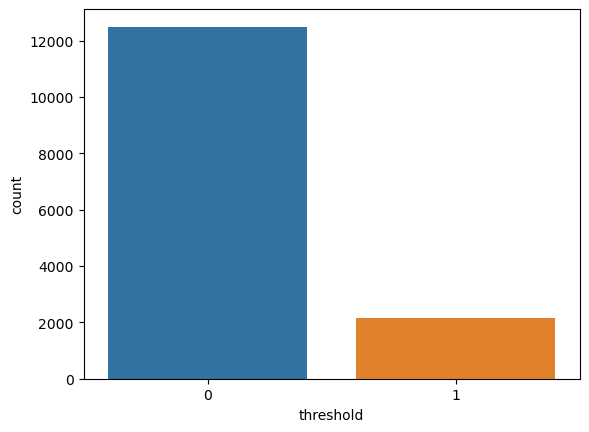

In [25]:
test(0,0.059682,'EMA','deviation_close_EMA')

### RESULTS

If we predicted the next value of each Closing Price within this data to fall within a 0 - 0.06 range we would have been correct on 2168/12495 observations which is 14%. That means that we would have been incorrect 86% of the time. 

### EVALUATION
The last observation recorded for the Close price 6.25. The next data point has a 14% chance of falling between 6.25 - 6.31 based on this dataset. 

This prediction takes into considertation the direction of the trend in this case being a BULLISH prediction. This is becase we are prediction the value to fall within a postive range. We need to compute the statistics as RAW numerical deviation not considering the direction of the trend.

### CONCLUSION
Next, we need to compute the MACD from the RL not considering trend direction. This will give us a more accurate range that that Closing price is likely to fall within.